In [841]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from sklearn.metrics import fbeta_score,accuracy_score,precision_score,recall_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
     }  #
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
#from scikeras.wrappers import KerasRegressor
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
# Import thi slibrary to suppress the warnings
import warnings
warnings.filterwarnings('ignore')   
from tensorflow.python.keras.layers import Flatten, Dense, Input, GlobalAveragePooling2D, \
    GlobalMaxPooling2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, \
    AveragePooling2D, Reshape, Permute, multiply
from keras_applications.imagenet_utils import _obtain_input_shape
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.keras import backend as K
from keras_vggface import utils
from tensorflow.python.keras.utils.layer_utils import get_source_inputs
import warnings
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import layers
#from keras.src.utils.module_utils import dmtree


ImportError: cannot import name 'dmtree' from 'keras.src.utils.module_utils' (C:\Users\burns\anaconda3\Lib\site-packages\keras\src\utils\module_utils.py)

In [842]:
#!pip install tensorflow.wrappers.scikit_learn



## Dataset dictionary
Data Dictionary of Data Set column description:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminium
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps


In [843]:
# Load the dataset from URL
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
#names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
#         'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
glass_data = pd.read_csv("glass_data.csv") # url, names=names)


## 
Data Exploration
This involves developing a knowledge and understanding of the data before beginnning any analysis. The following techniques are used:
- head() to view the first 5 records
- info() to get information on the file and the format of each of the fields
- describe() to get a statistical profile of the file
- shape to confirm the number of rows and columns in the dataset
-  isnull() to check for missing values
-  count the values of glass type to confirm all are present and see the balance in the dataset
-  are there large disparieties in the size of the data variables that might require      scaling/normalisation of the data


In [844]:
glass_data.head()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [845]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [846]:
glass_data.describe()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [847]:
glass_data.shape

(214, 11)

In [848]:
# Check for missing values
missing_values = glass_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id      0
ri      0
na      0
mg      0
al      0
si      0
k       0
ca      0
ba      0
fe      0
type    0
dtype: int64


In [849]:
# Display the unique classes present in y_test and their counts
#Results indicate an unbalanced data set
counts = glass_data['type'].value_counts()
# Display the counts
print(counts)

type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [850]:
# Replace non-numeric values with NaN in 'ca' and 'thal' columns
# heart_data['ca'] = pd.to_numeric(heart_data['ca'], errors='coerce')
# heart_data['thal'] = pd.to_numeric(heart_data['thal'], errors='coerce')

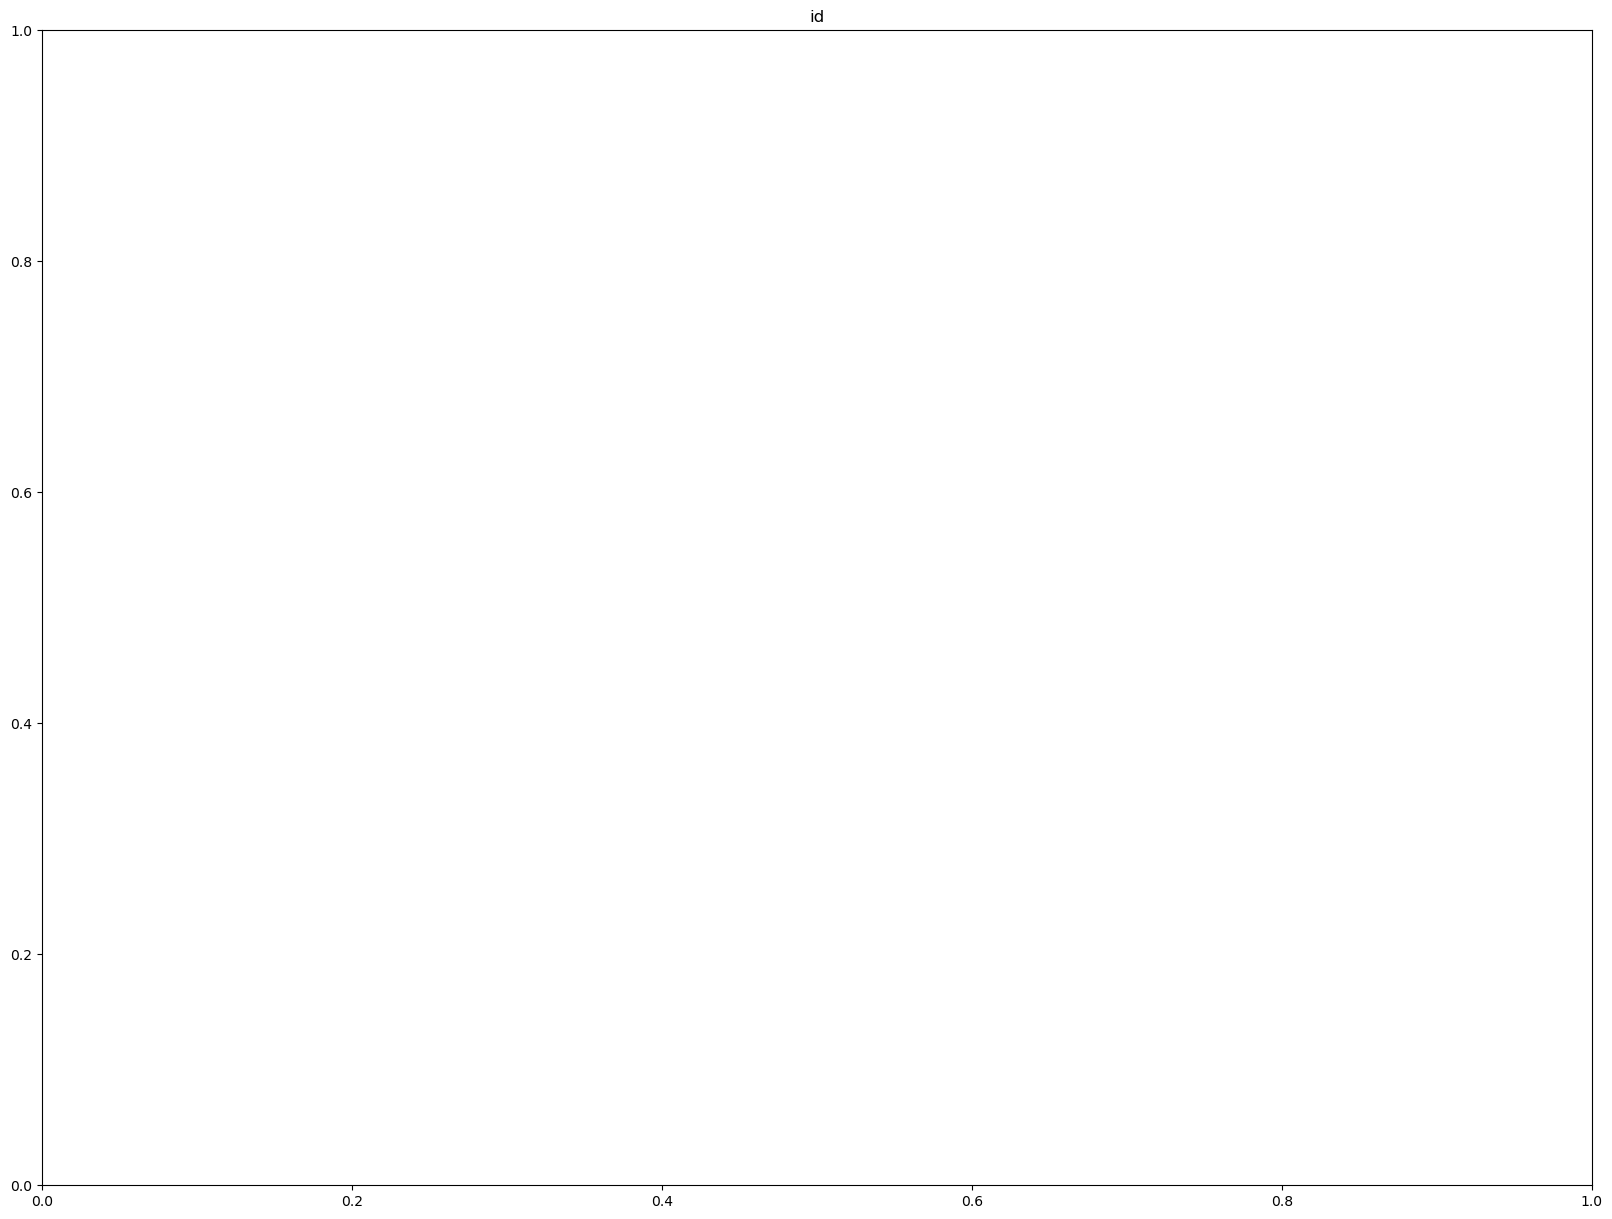

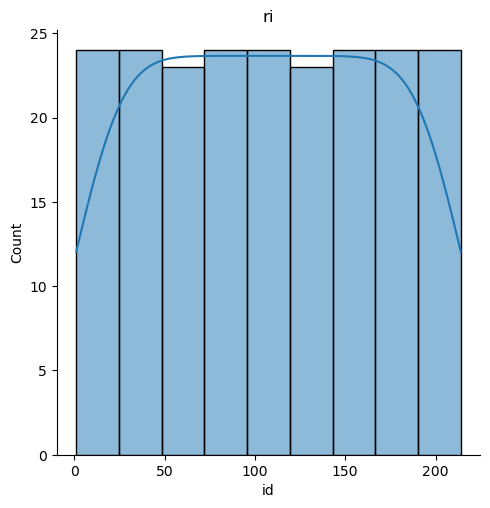

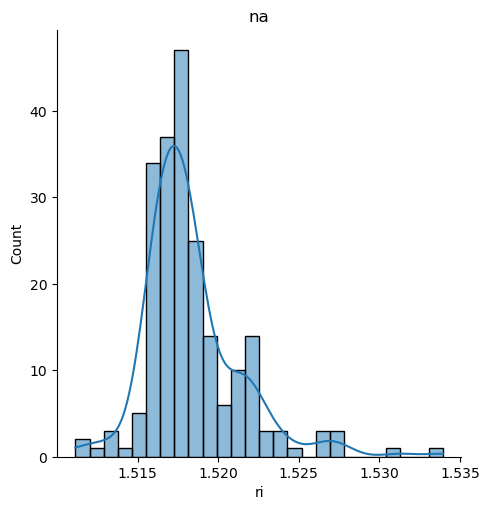

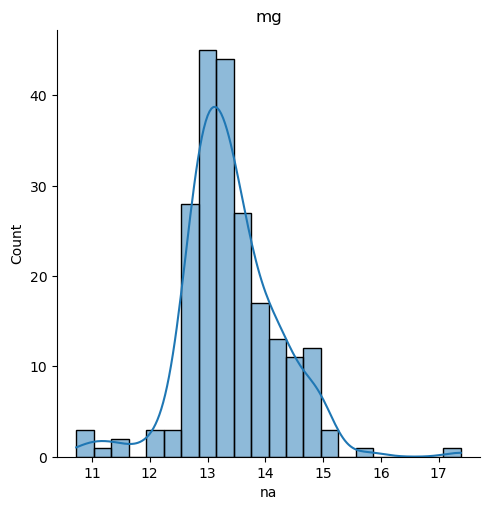

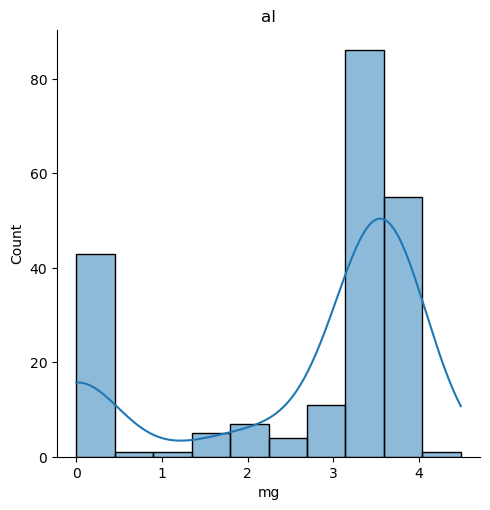

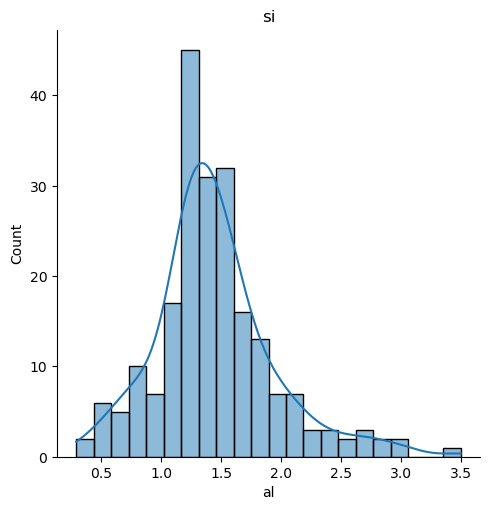

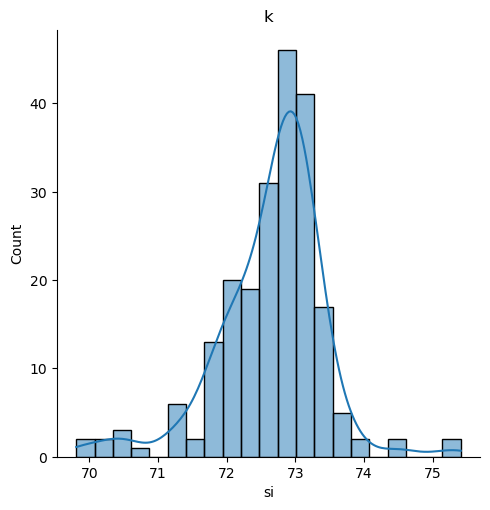

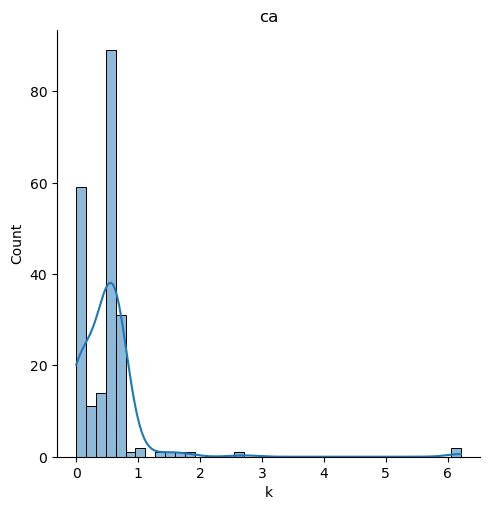

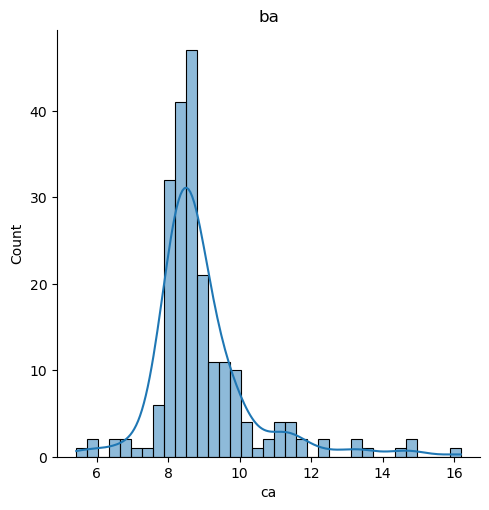

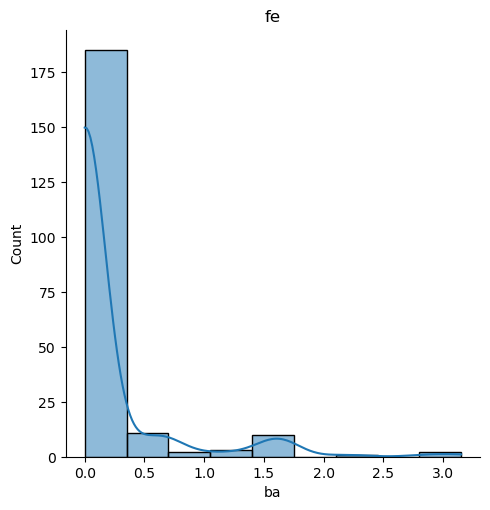

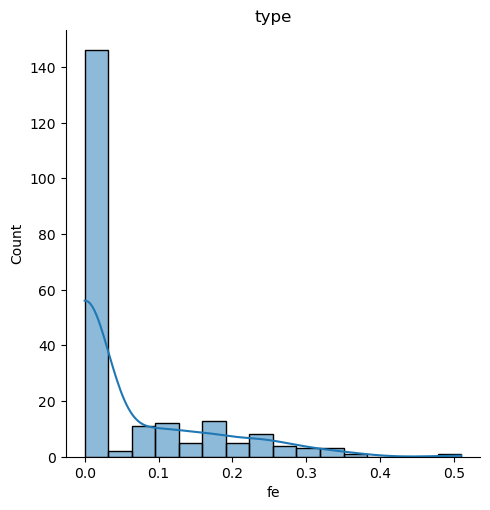

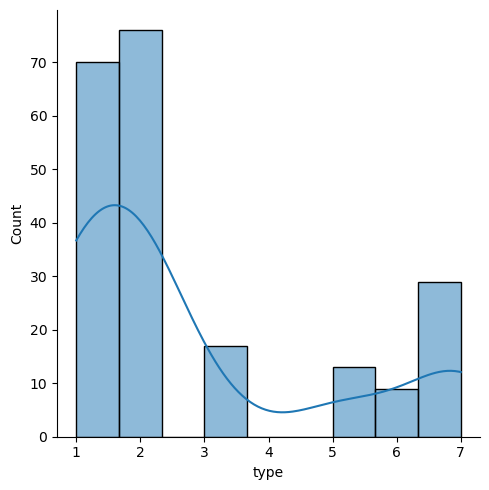

In [851]:
#i = 1
plt.figure(figsize=(20,15))
for x in glass_data.columns:
  #plt.subplot(4,4,i)
  plt.title(x)
  sns.displot(glass_data[x],kind="hist", kde=True)
  #i+=1

In [852]:
# Drop rows with NaN values
# heart_data = heart_data.dropna()


In [853]:
# Split features and target variable
#drop type as it is the target variable
# drop id as it is an index variable for the dataset and not a relevent attribute
X = glass_data.drop(['id','type'], axis=1)
y = glass_data['type']

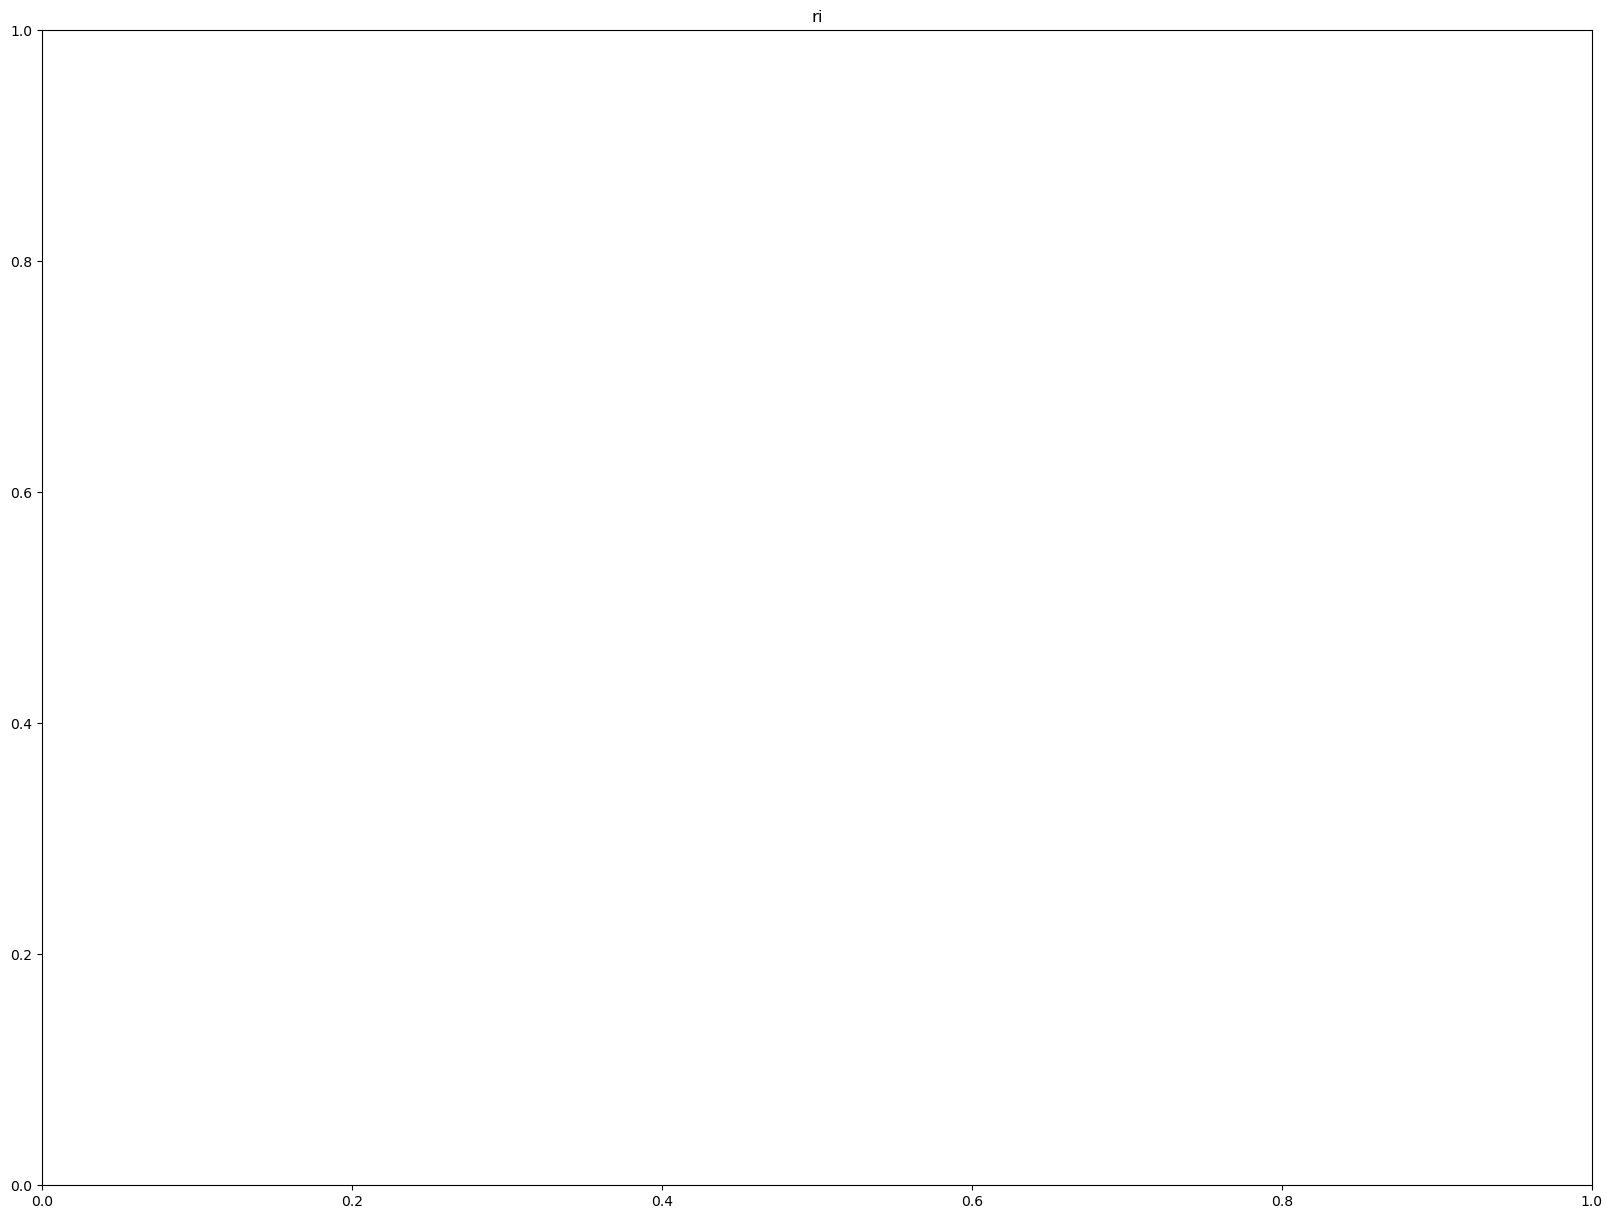

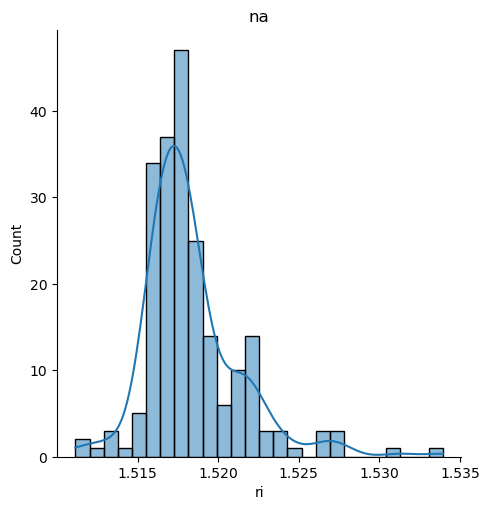

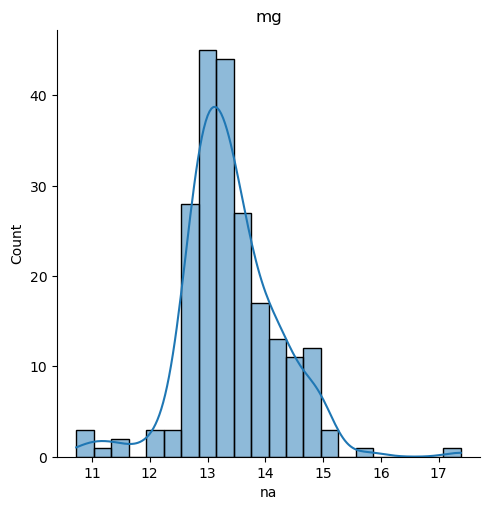

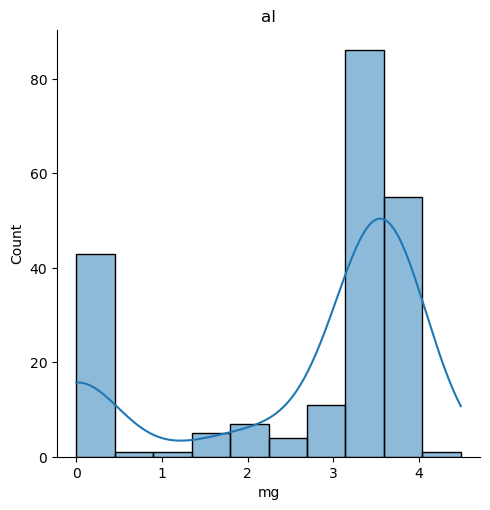

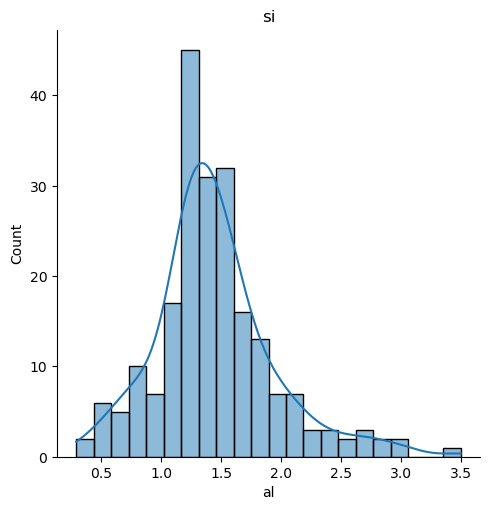

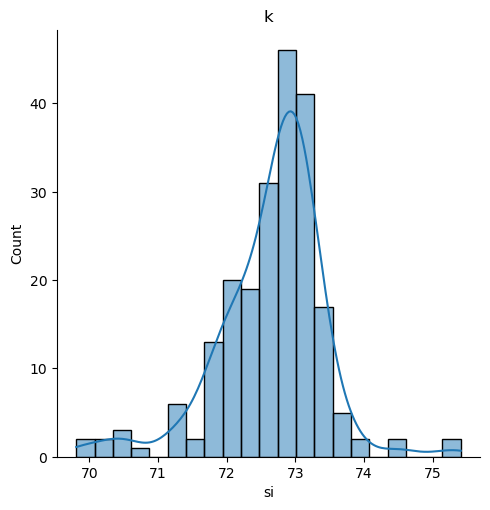

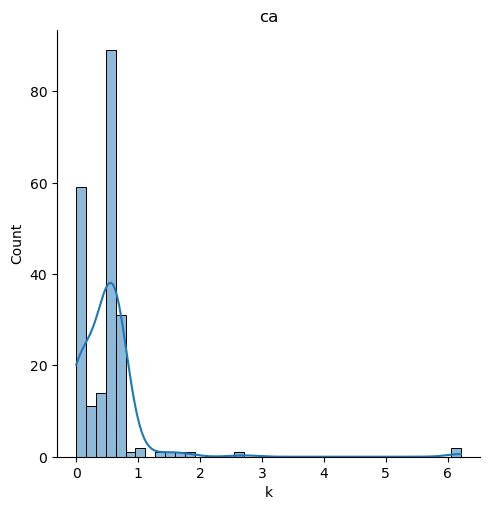

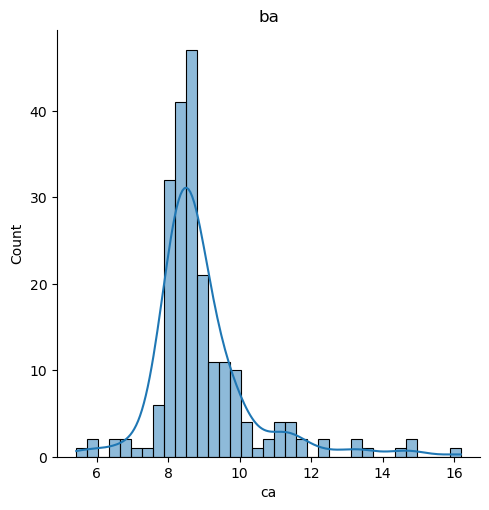

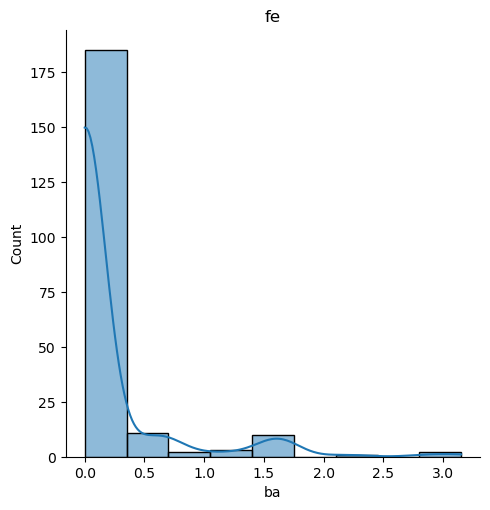

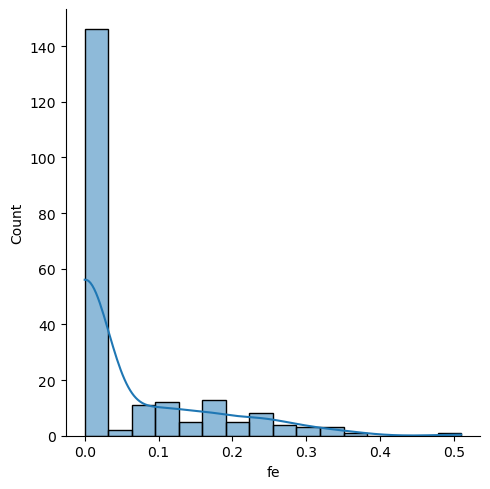

In [854]:
i = 1
plt.figure(figsize=(20,15))
for x in X.columns:
  #plt.subplot(4,4,i)
  plt.title(x)
  sns.displot(glass_data[x],kind="hist", kde=True)
  #i+=1

In [855]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: type, Length: 214, dtype: int64

In [856]:
y = y.map({1:0,2:1,3:2,5:3,6:4,7:5})

In [857]:
y

0      0
1      0
2      0
3      0
4      0
      ..
209    5
210    5
211    5
212    5
213    5
Name: type, Length: 214, dtype: int64

In [858]:
#moved after SMOTE
# Apply one-hot encoding 
#y = pd.get_dummies(y)
#y=y*1
#print(y)

In [859]:
X

,ri,na,mg,al,si,k,ca,ba,fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [860]:
# can see above that therer are disparieties in the size of the data fields
# can normalise the data to make more comparable
## Normalise Data 
sca = StandardScaler()
X_scaled = sca.fit_transform(X)


In [861]:
len(X_scaled)

214

In [862]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [863]:
y_train

137    1
65     0
108    1
181    4
31     0
      ..
106    1
14     0
92     1
179    4
102    1
Name: type, Length: 149, dtype: int64

In [864]:
# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [865]:
X_train.shape

(149, 9)

In [866]:
X_train_smote.shape

(318, 9)

In [867]:
X_train_smote

array([[-4.14363045e-01, -6.35638495e-01,  6.50066245e-01, ...,
        -5.96526286e-01, -3.52876828e-01, -5.86450902e-01],
       [ 8.66266463e-01,  3.46326045e-01,  6.29218923e-01, ...,
         3.12036729e-01, -3.52876828e-01, -5.86450902e-01],
       [ 1.27223922e+00,  1.25464325e+00, -1.86551055e+00, ...,
         1.80517905e+00, -3.52876828e-01,  2.36503151e-01],
       ...,
       [ 7.04229570e-01,  1.84515625e+00,  3.22618846e-04, ...,
        -1.43189570e+00,  2.97357104e+00, -5.86450902e-01],
       [ 1.71379618e+00,  2.83479976e+00, -5.73736478e-01, ...,
        -1.81091390e-01,  2.76924683e+00, -5.86450902e-01],
       [-9.38221989e-01,  6.73716278e-01, -1.86551055e+00, ...,
         2.55506958e-01,  1.23540474e+00, -4.92684803e-01]])

In [868]:
y_train_smote.info()

<class 'pandas.core.series.Series'>
RangeIndex: 318 entries, 0 to 317
Series name: type
Non-Null Count  Dtype
--------------  -----
318 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [869]:
y_train_smote

0      1
1      0
2      1
3      4
4      0
      ..
313    5
314    5
315    5
316    5
317    5
Name: type, Length: 318, dtype: int64

In [870]:
# Display the unique classes present in y_test and their counts
counts = y_train_smote.value_counts()
# Display the counts
print(counts)

type
1    53
0    53
4    53
3    53
2    53
5    53
Name: count, dtype: int64


In [871]:
# Apply one-hot encoding
y_train_smote = pd.get_dummies(y_train_smote)
y_train_smote = y_train_smote*1
print(y_train_smote)

     0  1  2  3  4  5
0    0  1  0  0  0  0
1    1  0  0  0  0  0
2    0  1  0  0  0  0
3    0  0  0  0  1  0
4    1  0  0  0  0  0
..  .. .. .. .. .. ..
313  0  0  0  0  0  1
314  0  0  0  0  0  1
315  0  0  0  0  0  1
316  0  0  0  0  0  1
317  0  0  0  0  0  1

[318 rows x 6 columns]


In [872]:
# Build the model
def build_dens_model():

    model = models.Sequential()
    model.add(layers.Dense(256, activation='tanh', input_shape=(X_train_smote.shape[1],)))
    model.add(layers.Dense(128, activation='tanh'))
    model.add(layers.Dense(128, activation='tanh'))
    model.add(layers.Dense(6, activation='softmax'))
    return model


In [873]:
X_train_smote.shape[1]

9

In [874]:
model = build_dens_model()
model.summary()


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                     │ (None, 256)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,742 (206.02 KB)

 Trainable params: 52,742 (206.02 KB)

 Non-trainable params: 0 (0.00 B)

In [875]:
# Compile the model
model.compile(optimizer='adam',
              #loss='binary_crossentropy',
               #loss="sparse_categorical_crossentropy",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [876]:
### Train the model
model.fit(X_train_smote, y_train_smote, epochs=5, batch_size=8, validation_split=0.2)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.4803 - loss: 1.3911 - val_accuracy: 0.7969 - val_loss: 0.6927
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6617 - loss: 0.8481 - val_accuracy: 0.9062 - val_loss: 0.3538
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.6619 - loss: 0.8045 - val_accuracy: 0.9375 - val_loss: 0.2487
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7304 - loss: 0.6457 - val_accuracy: 0.9688 - val_loss: 0.1791
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8127 - loss: 0.5628 - val_accuracy: 0.9844 - val_loss: 0.1127


In [877]:
X_test

array([[-2.69137018e-01, -5.00618371e-01,  6.36168030e-01,
        -1.70460232e-01,  4.38786730e-01,  1.12106515e-01,
        -3.92275686e-01, -3.52876828e-01,  5.45110920e-01],
       [-3.61553581e-01,  1.58605628e+00, -1.86551055e+00,
         1.79700922e+00,  8.14077586e-01, -7.63918639e-01,
        -4.90385747e-03,  9.77617652e-01, -5.86450902e-01],
       [ 1.04119781e+00, -4.39245587e-01,  6.70913566e-01,
        -1.15419496e+00, -5.57675197e-01, -4.71910254e-01,
         6.28977316e-01, -3.52876828e-01,  1.16232646e+00],
       [-7.74127520e-01,  1.77017463e+00, -1.86551055e+00,
         1.87731409e+00,  8.14077586e-01, -7.63918639e-01,
        -1.38723216e-01,  9.37299637e-01,  3.39372407e-01],
       [-4.24264820e-01,  3.83149716e-01,  6.91760888e-01,
         7.32969618e-01, -7.64732220e-01,  2.19688551e-01,
        -7.58518141e-01, -3.52876828e-01, -5.86450902e-01],
       [ 2.97864503e+00, -2.93098061e+00, -1.86551055e+00,
        -1.39510958e+00,  5.55256306e-01, -7.639186

In [878]:
y_test

9      0
197    5
66     0
191    5
117    1
      ..
5      0
135    1
56     0
199    5
173    3
Name: type, Length: 65, dtype: int64

In [879]:
#y_test = y_test.tolist()
#y_pred = y_pred.tolist()
#X_test = X_test.tolist()
#X_test = np.array(X_test)
#y_test = np.array(y_test)
# Apply one-hot encoding
y_test = pd.get_dummies(y_test)
y_test = y_test*1
print(y_test)

     0  1  2  3  4  5
9    1  0  0  0  0  0
197  0  0  0  0  0  1
66   1  0  0  0  0  0
191  0  0  0  0  0  1
117  0  1  0  0  0  0
..  .. .. .. .. .. ..
5    1  0  0  0  0  0
135  0  1  0  0  0  0
56   1  0  0  0  0  0
199  0  0  0  0  0  1
173  0  0  0  1  0  0

[65 rows x 6 columns]


In [880]:
 # Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('\nTest accuracy:', test_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6862 - loss: 0.9537

Test accuracy: 0.6615384817123413


In [881]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [882]:
# Reverse One Hot Encoding
y_test = pd.from_dummies(y_test)

In [883]:
print(y_pred)

[1 5 0 5 1 1 0 2 1 1 4 3 0 1 4 3 5 2 2 4 3 5 5 5 2 1 1 0 3 0 1 1 2 2 0 5 3
 2 0 5 3 5 0 1 0 4 1 1 3 0 0 0 0 2 0 1 5 2 3 0 1 1 2 5 2]


In [884]:
y_test.shape

(65, 1)

In [885]:
y_pred.shape

(65,)

In [886]:
print(type(y_pred))
y_pred = pd.DataFrame(y_pred)
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [887]:
# Create a DataFrame to display actual and predicted values
y_test = y_test.values.tolist()
# y_pred = list(y_pred)
y_pred = y_pred.values.tolist()
#results = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred.values.flatten())})
#results = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred)})
#print(results)

In [888]:
ann_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy of ANN:",ann_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

Accuracy of ANN: 66.15384615384615 

              precision    recall  f1-score   support

           0       0.73      0.58      0.65        19
           1       0.69      0.48      0.56        23
           2       0.27      0.75      0.40         4
           3       0.62      0.83      0.71         6
           4       0.75      1.00      0.86         3
           5       0.91      1.00      0.95        10

    accuracy                           0.66        65
   macro avg       0.66      0.77      0.69        65
weighted avg       0.71      0.66      0.67        65



In [889]:
# Make predictions
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [890]:
###Hyperparameter Tuning

In [907]:

   # Define the Keras model with early stopping
def create_model(layers=3, neurons=32, epochs=50):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation='relu', input_shape=(X_test.shape[1],)))
    for _ in range(layers - 1):
        model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [914]:
# Define the grid search parameters
param_grid = {
    'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
    'layers': [2, 3],  # Number of hidden layers
    'neurons': [64, 128],  # Number of neurons per layer
    'epochs': [50, 100]  # Number of epochs
}

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0,layers=2,neurons=64)

# Perform grid search with early stopping
grid_search = GridSearchCV(estimator=model, param_grid=param_grid) #, cv=3, verbose=2)
#print(X_test)
#print(y_test)
grid_search.fit(X_train_smote, y_train_smote)  # , callbacks=[early_stopping])

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

[[-2.69137018e-01 -5.00618371e-01  6.36168030e-01 -1.70460232e-01
   4.38786730e-01  1.12106515e-01 -3.92275686e-01 -3.52876828e-01
   5.45110920e-01]
 [-3.61553581e-01  1.58605628e+00 -1.86551055e+00  1.79700922e+00
   8.14077586e-01 -7.63918639e-01 -4.90385747e-03  9.77617652e-01
  -5.86450902e-01]
 [ 1.04119781e+00 -4.39245587e-01  6.70913566e-01 -1.15419496e+00
  -5.57675197e-01 -4.71910254e-01  6.28977316e-01 -3.52876828e-01
   1.16232646e+00]
 [-7.74127520e-01  1.77017463e+00 -1.86551055e+00  1.87731409e+00
   8.14077586e-01 -7.63918639e-01 -1.38723216e-01  9.37299637e-01
   3.39372407e-01]
 [-4.24264820e-01  3.83149716e-01  6.91760888e-01  7.32969618e-01
  -7.64732220e-01  2.19688551e-01 -7.58518141e-01 -3.52876828e-01
  -5.86450902e-01]
 [ 2.97864503e+00 -2.93098061e+00 -1.86551055e+00 -1.39510958e+00
   5.55256306e-01 -7.63918639e-01  4.22801375e+00 -3.52876828e-01
  -5.86450902e-01]
 [-2.49333469e-01 -7.33834949e-01  5.94473387e-01 -4.31451078e-01
   7.62313330e-01  1.2747537

ValueError: 
All the 280 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\burns\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
  File "C:\Users\burns\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\burns\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\burns\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 925, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\burns\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 862, in _initialize
    self.model_ = self._build_keras_model()
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\burns\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 433, in _build_keras_model
    model = final_build_fn(**build_params)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\burns\AppData\Local\Temp\ipykernel_22372\1001190305.py", line 4, in create_model
    model.add(layers.Dense(neurons, activation='relu', input_shape=(X_test.shape[1],)))
              ^^^^^^^^^^^^
AttributeError: 'int' object has no attribute 'Dense'


In [893]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

NameError: name 'best_params' is not defined

In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Print classification report and accuracy score
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)